## classify the Size_Categorie using SVM.

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

Load and check data

In [2]:
data = pd.read_csv('forestfires.csv')
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


EDA

In [3]:
data.shape

(517, 31)

<AxesSubplot: >

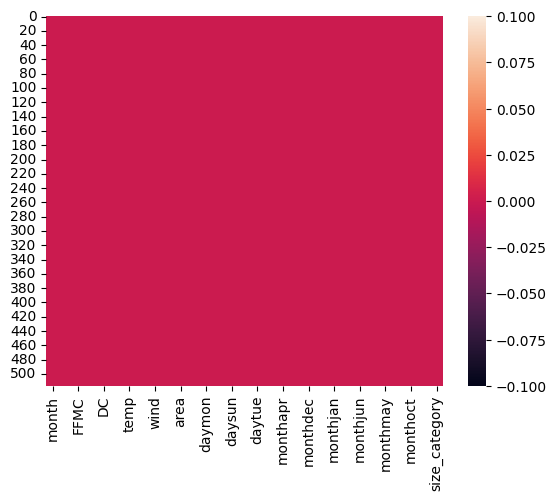

In [4]:
sns.heatmap(data.isnull())

In [5]:
data.duplicated().sum()

8

In [8]:
data.drop_duplicates(inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          509 non-null    object 
 1   day            509 non-null    object 
 2   FFMC           509 non-null    float64
 3   DMC            509 non-null    float64
 4   DC             509 non-null    float64
 5   ISI            509 non-null    float64
 6   temp           509 non-null    float64
 7   RH             509 non-null    int64  
 8   wind           509 non-null    float64
 9   rain           509 non-null    float64
 10  area           509 non-null    float64
 11  dayfri         509 non-null    int64  
 12  daymon         509 non-null    int64  
 13  daysat         509 non-null    int64  
 14  daysun         509 non-null    int64  
 15  daythu         509 non-null    int64  
 16  daytue         509 non-null    int64  
 17  daywed         509 non-null    int64  
 18  monthapr  

In [11]:
data.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [12]:
num_columns = ['area','FFMC','DMC','DC','ISI','temp','RH','wind','rain']
cat_columns = ['month','day','size_category']

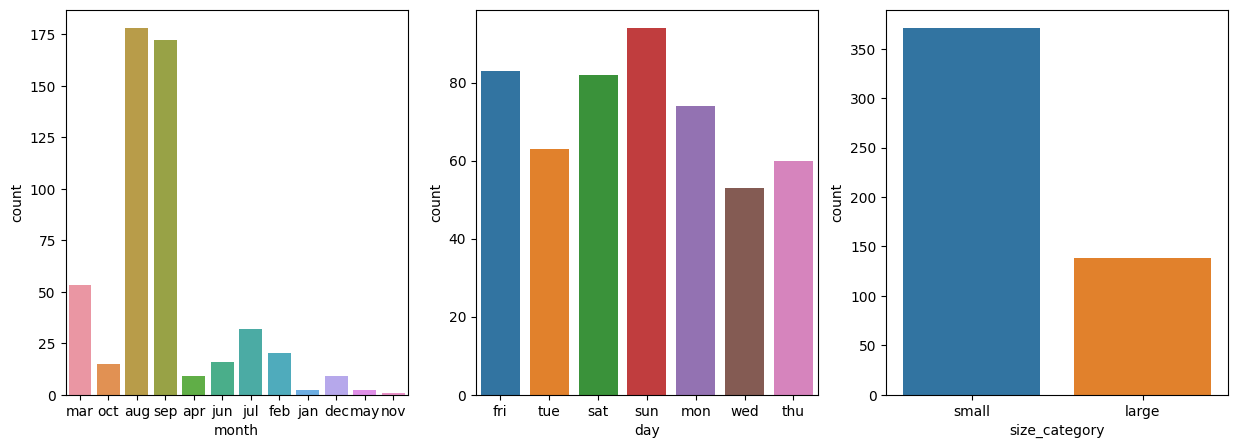

In [13]:
plt.figure(figsize=(15,5))
for i in range(len(cat_columns)):
    plt.subplot(1,3,i+1)
    sns.countplot(data=data, x=cat_columns[i])

Pre processing

In [14]:
data[num_columns].describe()

,area,FFMC,DMC,DC,ISI,temp,RH,wind,rain
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,12.992908,90.618075,110.235756,547.787623,9.023576,18.865422,44.253438,4.011395,0.020432
std,64.133357,5.555527,63.804112,248.196222,4.585083,5.841083,16.365192,1.800926,0.296261
min,0.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000
25%,0.000000,90.200000,62.300000,437.700000,6.400000,15.400000,32.000000,2.700000,0.000000
50%,0.610000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000
75%,6.580000,92.900000,141.300000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000
max,1090.840000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000


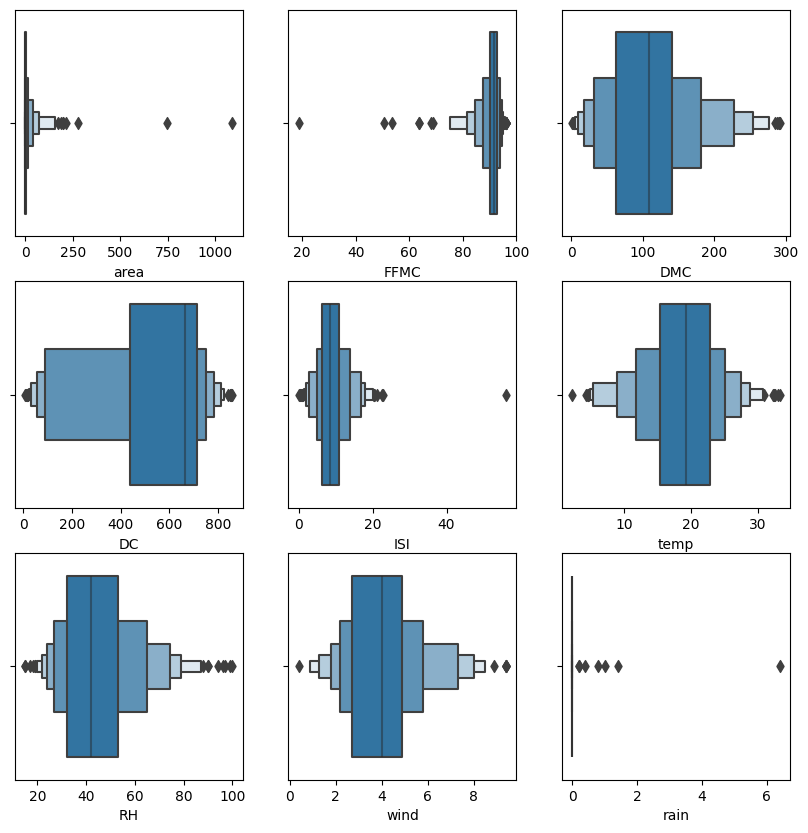

In [15]:
plt.figure(figsize=(10,10))
for i in range(len(num_columns)):
    plt.subplot(3,3,i+1)
    sns.boxenplot(data=data,x=num_columns[i])

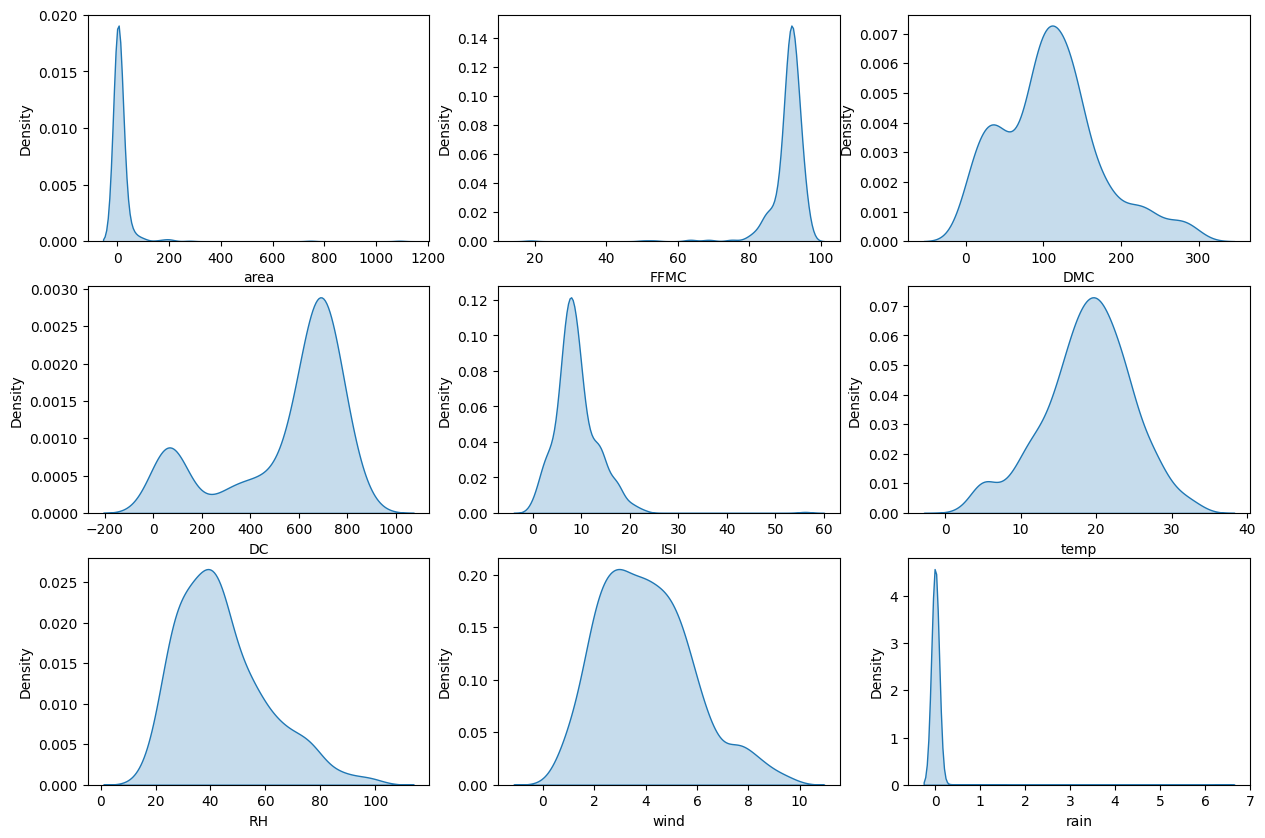

In [16]:
plt.figure(figsize=(15,10))
for i in range(len(num_columns)):
    plt.subplot(3,3,i+1)
    sns.kdeplot(data=data,x=num_columns[i], fill=True)

remove outliers

In [17]:
print(f"Outlier Index of area column : {data[data['area']>200].index}")
print(f"Outlier Index of FFMC column : {data[data['FFMC']<70].index}")
print(f"Outlier Index of ISI column : {data[data['ISI']>30].index}")
print(f"Outlier Index of rain column : {data[data['rain']>1].index}")

Outlier Index of area column : Int64Index([236, 237, 238, 415, 479], dtype='int64')
Outlier Index of FFMC column : Int64Index([12, 97, 130, 199, 299, 312, 379], dtype='int64')
Outlier Index of ISI column : Int64Index([22], dtype='int64')
Outlier Index of rain column : Int64Index([499, 509], dtype='int64')


In [18]:
data.drop(data[data['area']>200].index, axis=0, inplace=True)
data.drop(data[data['FFMC']<70].index, axis=0, inplace=True)
data.drop(data[data['ISI']>30].index, axis=0, inplace=True)
data.drop(data[data['rain']>1].index, axis=0, inplace=True)

In [19]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data.iloc[:,-1] = labelencoder.fit_transform(data.iloc[:,-1])
data.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_21016\2175106690.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,-1] = labelencoder.fit_transform(data.iloc[:,-1])


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1


In [20]:
array = data.values
x = array[:,2:30]
y = array[:,-1].astype('int')

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3)

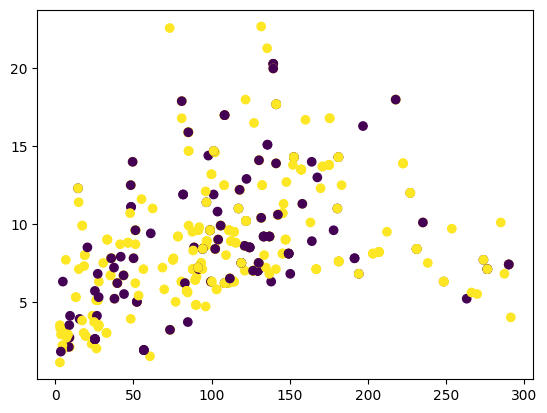

In [21]:
plt.scatter(data['DMC'],data['ISI'],c=data['size_category'])

model building and prediction

In [22]:
clf = SVC(kernel='rbf', gamma=0.0001)
clf.fit(xtrain,ytrain)


SVC(gamma=0.0001)

In [23]:
y_pred = clf.predict(xtest)
confusion_matrix(ytest,y_pred)

array([[ 14,  22],
       [  0, 113]], dtype=int64)

In [24]:
acc = accuracy_score(ytest,y_pred)*100
print('accuracy: ',acc)


accuracy:  85.23489932885906


### Grid Search CV

In [25]:
clf =SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5,1,0.0001],'C':[1,15,14,13,12,11,10,0.1]}]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1, 15, 14, 13, 12, 11, 10, 0.1],
                          'gamma': [50, 5, 10, 0.5, 1, 0.0001],
                          'kernel': ['rbf']}])

In [26]:
gsv.best_params_,gsv.best_score_

({'C': 15, 'gamma': 0.0001, 'kernel': 'rbf'}, 0.9127731092436975)

## train with the best parameters 

In [27]:
clf = SVC(C=15, kernel='rbf', gamma=0.0001)
clf.fit(xtrain,ytrain)

SVC(C=15, gamma=0.0001)

### accuracy of the model

In [28]:
y_pred = clf.predict(xtest)
confusion_matrix(ytest,y_pred)

array([[ 26,  10],
       [  1, 112]], dtype=int64)

In [29]:
acc = accuracy_score(ytest, y_pred)*100
print('accuracy: ', acc)

accuracy:  92.61744966442953
